In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.backend import set_session

In [2]:
# reading the dataset using pandas's library

df = pd.read_csv("musk_csv.csv")

In [3]:
# display the head dataset

df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
# information and shape of dataset

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


(6598, 170)

In [5]:
# Splitting the dataset into independent and dependent variables

X = df.iloc[:, 3:140].values
y = df.iloc[:, 169].values

In [6]:
# splitting the dataset into training and testing set

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Using tensorflow on dataset

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [8]:
# CNN layers for making a neural network model
model = Sequential()
    
model.add(Dense(8, input_dim = 137, kernel_initializer = 'normal', activation = 'relu', trainable = False))
    
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

    
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'] )
    
    

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,113
Trainable params: 9
Non-trainable params: 1,104
_________________________________________________________________


In [10]:
# training the the model for predicting the result

epochs = 25
history = model.fit(X_train, y_train,
                   batch_size = 40,
                   epochs = epochs,
                   verbose = 2,
                   validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 1s - loss: 1.0248 - acc: 0.7105 - val_loss: 0.5917 - val_acc: 0.7992
Epoch 2/25
 - 0s - loss: 0.4991 - acc: 0.8134 - val_loss: 0.3923 - val_acc: 0.8455
Epoch 3/25
 - 0s - loss: 0.3831 - acc: 0.8492 - val_loss: 0.3574 - val_acc: 0.8659
Epoch 4/25
 - 0s - loss: 0.3659 - acc: 0.8600 - val_loss: 0.3523 - val_acc: 0.8705
Epoch 5/25
 - 0s - loss: 0.3619 - acc: 0.8679 - val_loss: 0.3510 - val_acc: 0.8712
Epoch 6/25
 - 0s - loss: 0.3615 - acc: 0.8642 - val_loss: 0.3579 - val_acc: 0.8697
Epoch 7/25
 - 0s - loss: 0.3609 - acc: 0.8640 - val_loss: 0.3522 - val_acc: 0.8720
Epoch 8/25
 - 0s - loss: 0.3614 - acc: 0.8676 - val_loss: 0.3494 - val_acc: 0.8758
Epoch 9/25
 - 0s - loss: 0.3587 - acc: 0.8678 - val_loss: 0.3488 - val_acc: 0.8742
Epoch 10/25
 - 0s - loss: 0.3583 - acc: 0.8659 - val_loss: 0.3514 - val_acc: 0.8848
Epoch 11/25
 - 0s - loss: 0.3567 - acc: 0.8714 - val_loss: 0.3553 - val_a

In [11]:
# Seperate the acc, val_loss and val_acc

history.history

{'loss': [1.0247770608397495,
  0.4991127039817934,
  0.38313416313971477,
  0.3658763996214973,
  0.3619155479046647,
  0.36151551881853766,
  0.3608899151072804,
  0.3613507991805588,
  0.35870094317836987,
  0.3582583994023409,
  0.35669084456256955,
  0.3591384809660433,
  0.357518711599178,
  0.3567962731295076,
  0.3555071840868072,
  0.354232809802446,
  0.35393243648645417,
  0.35534608574155696,
  0.35302922380336443,
  0.3530631342951481,
  0.3527716509362611,
  0.3523985052953484,
  0.352479761976688,
  0.3508559996406885,
  0.35336575701454453],
 'acc': [0.7104964,
  0.8133763,
  0.8491853,
  0.8599848,
  0.8679424,
  0.8641531,
  0.8639636,
  0.8675635,
  0.8677529,
  0.86585826,
  0.8713528,
  0.8664267,
  0.8690792,
  0.8707844,
  0.86983705,
  0.87305796,
  0.8711633,
  0.8709738,
  0.87305796,
  0.86945814,
  0.8711633,
  0.8715423,
  0.8707844,
  0.8734369,
  0.8709738],
 'val_loss': [0.5916749293153937,
  0.3922534921404087,
  0.35736545107581397,
  0.352255533590461

In [12]:
# loss and test accuracy

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.34694799157706174
Test accuracy:  0.8780303


In [13]:
#loss and train accuracy
scores = model.evaluate(X_train, y_train, verbose = 0)
print("Train loss: ", scores[0])
print("Train accuracy: ", scores[1])

Train loss:  0.3564203333994709
Train accuracy:  0.8668056


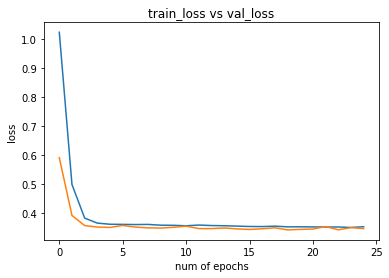

In [14]:
# plotting the train and vall loss

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']
xc = range(epochs)

plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title("train_loss vs val_loss")
plt.show()


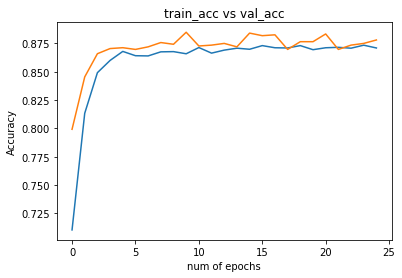

In [15]:
# plotting train and validation accuracy

plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('num of epochs')
plt.ylabel('Accuracy')
plt.title("train_acc vs val_acc")
plt.show()

In [16]:
# predicting the model accuracy

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])
print(model.predict_classes(X_test[1:5]))
print(y_test[1:5])

Test Score:  0.34694799157706174
Test Accuracy:  0.8780303
[[0]
 [0]
 [0]
 [0]]
[1 0 0 0]


In [17]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict_classes(X_test))

array([[1117,    3],
       [ 158,   42]], dtype=int64)

In [18]:
# Predicting precision, recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1120
           1       0.93      0.21      0.34       200

   micro avg       0.88      0.88      0.88      1320
   macro avg       0.90      0.60      0.64      1320
weighted avg       0.88      0.88      0.84      1320

